# 2. ML for Linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("seaborn")

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 2.2 Data preparation

In [3]:
df.rename(columns={c:c.lower().replace(' ','_') for c in df.columns.tolist()},inplace=True)

Now, we want to standarized the way the string fields are presented on the dataframe. So, we lowercase and replace the whitespaces for '_'

In [4]:
str_cols = df.select_dtypes('object').columns

df[str_cols]=df[str_cols].apply(lambda x: x.str.lower().str.replace(' ','_'))

In [5]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## 2.3 EDA

In [6]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:3])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat']
48

model
['1_series_m' '1_series' '100']
914

year
[2011 2012 2013]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)']
10

engine_hp
[335. 300. 230.]
356

engine_cylinders
[6. 4. 5.]
9

transmission_type
['manual' 'automatic' 'automated_manual']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive']
4

number_of_doors
[2. 4. 3.]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan']
16

highway_mpg
[26 28 27]
59

city_mpg
[19 20 18]
69

popularity
[3916 3105  819]
48

msrp
[46135 40650 36350]
6049



### Distribution of price

We see that this is a long tail distribution. Most of the distribution is on the lower end. We filter the cars that cost less that 100K in order to visualize better the distributions

<AxesSubplot:xlabel='msrp', ylabel='Count'>

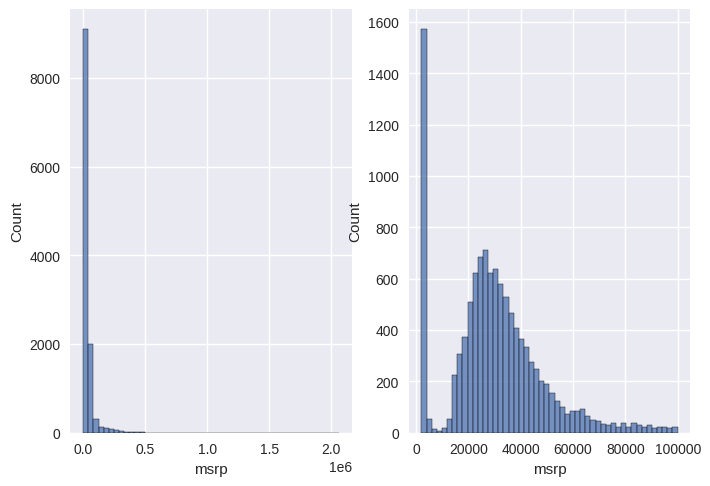

In [7]:
fig,ax = plt.subplots(ncols=2)
sns.histplot(df.msrp,bins=50,ax=ax[0])
sns.histplot(df.msrp[df.msrp < 100000],bins=50,ax=ax[1])

In [8]:
df["price_logs"] = np.log1p(df.msrp)

Now, we have a distribution that is close to a normal distribution which is an ideal distribution for working with Machine Learning

<AxesSubplot:xlabel='price_logs', ylabel='Count'>

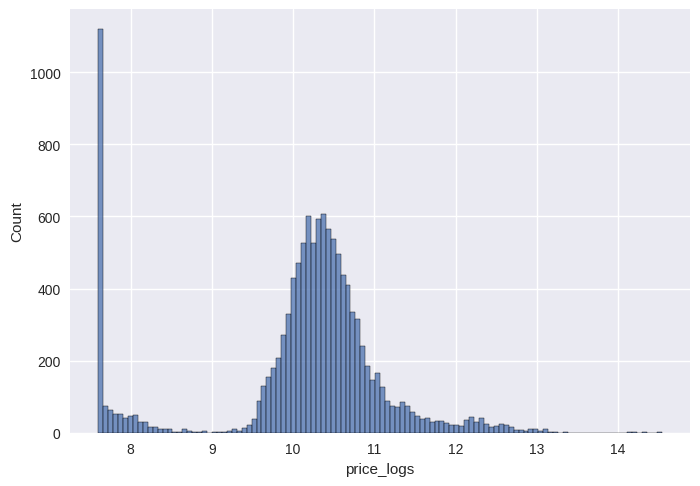

In [9]:
sns.histplot(df["price_logs"])

### Missing values

In [10]:
cols_with_nulls = df.isnull().sum()[df.isnull().sum()>0].index.values

#for c in cols_with_nulls:
#    print(c)
 #   print(df[c].mode())
    #print(df[c].mean())
 #   print()

## 2.4 Setting up the validation framework

In [11]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n- (n_val + n_test)

In [12]:
n,n_val+n_test+n_train

(11914, 11914)

In [13]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

However, we see that the data is organized and we should shuffle the data before we do the split

In [14]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,price_logs
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645,11.061092
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195,11.053996
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650,11.247018
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135,11.143831
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560,11.090736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380,10.528918
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100,10.599157
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560,10.658694
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860,10.665718


In [15]:
np.random.seed(2)

In [16]:
idxs = np.arange(n)
np.random.shuffle(idxs)

df_train = df.iloc[idxs[:n_train]]
df_val = df.iloc[idxs[n_train:n_train+n_val]]
df_test = df.iloc[idxs[n_train+n_val:]]

In [17]:
len(df_train),len(df_val),len(df_test)

(7150, 2382, 2382)

In [18]:
df_train.reset_index(drop=True,inplace=True)
df_val.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)


In [19]:
y_train = df_train['price_logs'].values
y_val = df_val['price_logs'].values
y_test = df_test['price_logs'].values

In [20]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 2.5 Linear regression

In [21]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
price_logs                             13.081075
Name: 10, dtype: object

In [22]:
xi = [453,11,86]
w0 = 7.17
w = [0.01,0.04,0.002]

In [23]:
def linear_regression(xi):
    y_pred = w0 + np.sum(np.array(w)*np.array(xi))
    return y_pred


In [24]:
pred = linear_regression(xi)
np.expm1(pred),pred

(222347.22211010658, 12.312000000000001)

## 2.6 Linear regression in vector form

In [25]:
def dot(xi,w):
    assert xi.shape[0] == w.shape[0]
    result = np.sum(xi*w) 
    return result

def linear_regression_vect(xi,w):
    pred = w0 + dot(xi,w)
    return pred

To simplify the expresion we can add **w_0** into **w** vector. So, we can expand **Xi* vector by adding 1 as first element in the list. Thus, the first element in **w** would be $1*w_0$

In [26]:
w_new = [w0] + w

In [27]:
def linear_regression_vect(xi,w):
    xi = [1] + xi
    return dot(np.array(xi),np.array(w))

In [28]:
linear_regression_vect(xi,w_new)

12.312

Now, we expand this expresion to take into account the feature matrix **X**, and we have the weight vector **w**

$Y = X.w$

In [29]:
x1 = [1,148,24,1385]
x2 = [1,132,25,2031]
x3 = [1,453,11,86]

X = [x1,x2,x3]
X = np.array(X)

In [30]:
def linear_regression(X,w):
    return X.dot(w)

In [31]:
preds = linear_regression(X,w_new)

## 2.7 Train a Linear regression

$X^T.X.w \approx X^T.y$, where $X^T.X$ is called the Gram matrix, with size (n+1,n+1)

so, we can do 

$(X^T.X)^{-1}X^T.X.w \approx (X^T.X)^{-1}X^T.y$


In [32]:
def train_linear_regression(X,y):
    pass

In [33]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)

y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]


In [34]:
ones = np.ones(X.shape[0])

X = np.column_stack([ones,X])

X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [35]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)

w_full = XTX_inv.dot(X.T).dot(y)
w0 = w_full[0] # This is the bias which is how much this car would cost if we don t know anything about the car
w = w_full[1:]

In [36]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])

    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0] 
    w = w_full[1:]
    return w0, w 

In [37]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)

y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [38]:
train_linear_regression(X,y)

(25844.754055766833, array([ -16.08906468, -199.47254894,   -1.22802883]))

## 2.8 Car price baseline model

In [39]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
price_logs           float64
dtype: object

In [40]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']


X_train = df_train[base].values

In [41]:
train_linear_regression(X_train,y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [42]:
X_train = df_train[base].fillna(0).values

In [43]:
w0,w = train_linear_regression(X_train,y_train)

In [44]:
y_preds = X_train.dot(w) + w0

<AxesSubplot:ylabel='Count'>

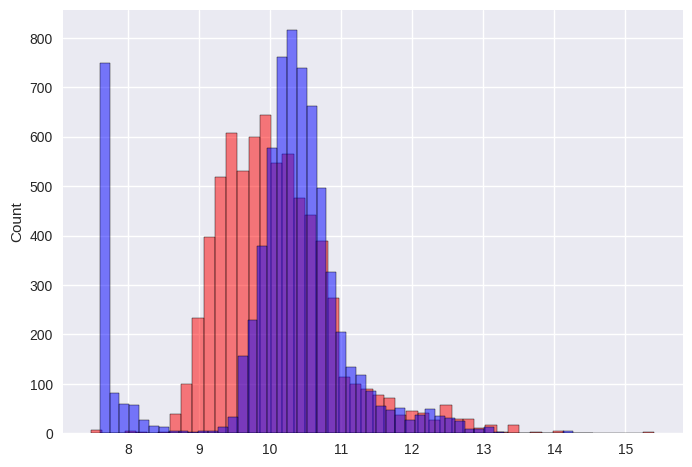

In [45]:
sns.histplot(y_preds,color='r',alpha=0.5,bins=50,label='Preds')
sns.histplot(y_train,color='b',alpha=0.5,bins=50,label='Actual')

<AxesSubplot:>

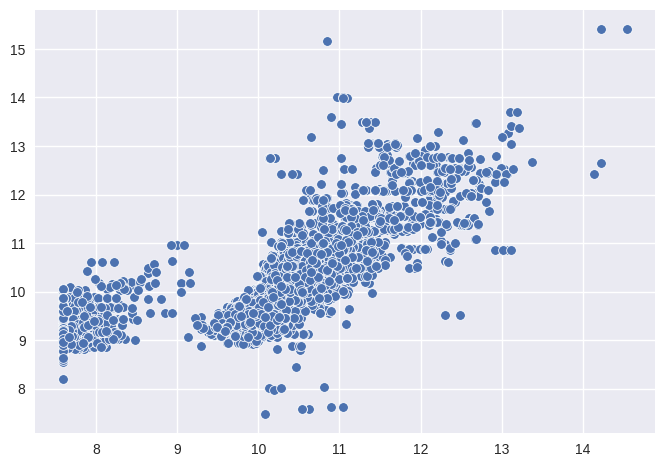

In [46]:
sns.scatterplot(x=y_train,y=y_preds)

## 2.9 RMSE

$RMSE = \sqrt{\frac{1}{m}\sum(y_i^t - y_i)^2}$

where $y_i^t $ is the prediction, $y_i$ is the actual value. $m$ is the number of samples

In [47]:
def rmse(y_preds,y):

    mse = np.sum((y_preds-y)**2)/len(y_preds)
    rmse = np.sqrt(mse)
    return rmse

In [48]:
rmse(y_preds=y_preds,y=y_train)

0.7554192603920132

## 2.10 Validating the model

In [49]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X 

In [50]:
# Train
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)

# Validation
X_val = prepare_X(df_val)
y_val_pred = X_val.dot(w) + w0


rmse(y_preds=y_val_pred,y=y_val)

0.7616530991301627

## 2.11 Simple feautre engineering

The year of the car is important for the retail price. So, we can calculate the "age" of the car. We need to check when the data was collected (2017), and substract the year of the car.

In [51]:
df_train.year.max()

2017

In [52]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X 

In [53]:
# Train
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)

# Validation
X_val = prepare_X(df_val)
y_val_pred = X_val.dot(w) + w0


rmse(y_preds=y_val_pred,y=y_val)

0.5172055461058326

<AxesSubplot:ylabel='Count'>

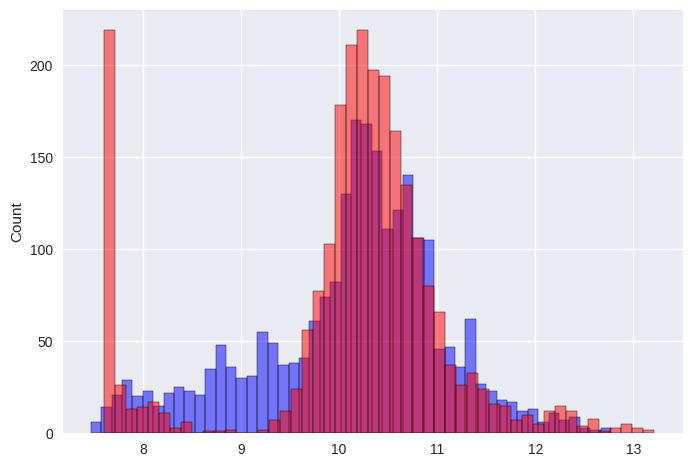

In [54]:
sns.histplot(y_val_pred,color='blue',alpha=0.5,bins=50)
sns.histplot(y_val,color='r',alpha=0.5,bins=50)

# 2.12 Categorical variables 

The number of doors while being an int, is in reality a categorical variable since points out to a type of car

In [55]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
price_logs           float64
dtype: object

In [56]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
        features.append(f'num_doors_{v}')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X 

In [57]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)

# Validation
X_val = prepare_X(df_val)
y_val_pred = X_val.dot(w) + w0


rmse(y_preds=y_val_pred,y=y_val)

0.5157995641502257

We see that our predictions did not improve significatively. So now, we look at the manufacturer.

In [58]:
makes = df.make.value_counts().head().index.tolist()

In [59]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
        features.append(f'num_doors_{v}')

    for m in makes:
        df[f'make_{m}'] = (df.make == m).astype('int')
        features.append(f'make_{m}')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X 

In [60]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)

# Validation
X_val = prepare_X(df_val)
y_val_pred = X_val.dot(w) + w0


rmse(y_preds=y_val_pred,y=y_val)

0.5076038849557561

In [61]:
cols = ['make','engine_fuel_type','transmission_type','driven_wheels','market_category','vehicle_size','vehicle_style'] 
categories = {c:df[c].value_counts().head().index.tolist() for c in cols}
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [62]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
        features.append(f'num_doors_{v}')

    
    for c,values in categories.items():
        for v in values:
            df[f'{c}_{v}'] =  (df[c] == v).astype('int')
            features.append(f'{c}_{v}') 
        

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X 

In [63]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)

# Validation
X_val = prepare_X(df_val)
y_val_pred = X_val.dot(w) + w0


rmse(y_preds=y_val_pred,y=y_val)

54.4325015067202

In [64]:
w0,w

(-1779041408437186.5,
 array([-5.10104271e-02,  2.96040055e+01,  2.69475329e+00,  6.59293954e+00,
         7.20792979e-03,  2.75575986e+00,  1.47249354e+03,  1.50718839e+03,
         1.49980749e+03, -1.00790042e+01, -2.36229001e+01, -8.38991660e+00,
        -1.40991396e+01,  1.25457297e+00, -2.42073549e+02, -2.13097270e+02,
        -2.11480299e+02, -2.04109751e+02, -3.25262780e+02,  1.20107693e+16,
         1.20107693e+16,  1.20107693e+16,  1.20107693e+16,  1.20107693e+16,
        -1.02317279e+16, -1.02317279e+16, -1.02317279e+16, -1.02317279e+16,
         1.00342608e+01, -1.74143653e+00, -2.04928499e+00,  2.74380588e-01,
         9.74527821e+00,  2.68829701e+01,  2.78659043e+01,  2.17722008e+01,
        -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
        -1.64412078e-01]))

# 2.13 Regularization

We see that the weights and bias are very big numbers, leading to our predictions to perform worst when we introduce the categorical features. With regularization, we control that the weights do not grow too much

$w = (X^T.X)^{-1}X^T.y$

The problem we are facing is in this term: 
$(X^T.X)^{-1}$; as exemplified here: 

In [65]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5],
]

X = np.array(X)
XTX = X.T.dot(X)
print(XTX)

[[140 111 111]
 [111 108 108]
 [111 108 108]]


We see that columns [1,2] are the same, which means that they can be expressed as a linear combination of the other. Thus, the inverse of this matrix does not exist

In [66]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

However, we did not face this problem. The reason for this is that our numbers might be expressed differently due to the data type and its precision. So, if we look at $(X^T.X)$ the columns [1,2] are not longer exactly the same. Thus, they are numerically invertible

In [ ]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001],
]

X = np.array(X)
XTX = X.T.dot(X)
print(XTX)
XTX_inv = np.linalg.inv(XTX)
print(XTX_inv)

[[140.        111.        111.0000004]
 [111.        108.        108.0000005]
 [111.0000004 108.0000005 108.000001 ]]
[[ 3.92646538e-02 -1.54615164e+05  1.54615122e+05]
 [-1.54615170e+05  3.51843724e+13 -3.51843721e+13]
 [ 1.54615129e+05 -3.51843721e+13  3.51843718e+13]]


In [67]:
y= [1, 2, 3, 1, 2, 3]

In [68]:
XTX_inv.dot(X.T).dot(y)

ValueError: shapes (4,4) and (3,6) not aligned: 4 (dim 1) != 3 (dim 0)

From above, we see that the elements [1,2] are large numbers. To solve this, we can add a small number $\alpha$ to the diagonal of the Gram matrix $X^T.X$

$$\begin{bmatrix}140. + \alpha   &    111.   &     111.0000004 \\
 111. &       108. + \alpha    &    108.0000005 & \\
 111.0000004 &  108.0000005 & 108.000001 + \alpha \end{bmatrix}$$

In [69]:
XTX = [
    [1, 2, 2],
    [2, 1, 1],
    [2, 1, 1]
]
XTX = np.array(XTX)
alpha = 0.01 * np.eye(len(XTX))

try:
    np.linalg.inv(XTX)
except:
    print("Nope")

finally:
    print(np.linalg.inv(XTX+alpha))



Nope
[[ -0.33668906   0.33501399   0.33501399]
 [  0.33501399  49.91540897 -50.08459103]
 [  0.33501399 -50.08459103  49.91540897]]


In [70]:
def train_linear_regression_reg(X, y, alpha=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + alpha * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [71]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression_reg(X_train,y_train,alpha=0.01)

# Validation
X_val = prepare_X(df_val)
y_val_pred = X_val.dot(w) + w0


rmse(y_preds=y_val_pred,y=y_val)

0.45652199011161526

## 2.14 Tuning the model

We want to optimize the value of $\alpha$.

In [72]:
rmses = {}
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
for alpha in [0.0,0.0001,0.0001,0.001,0.01,0.1,1,10]:
    
    w0,w = train_linear_regression_reg(X_train,y_train,alpha=alpha)
    # Validation
    y_val_pred = X_val.dot(w) + w0

    rmses.update({str(alpha):rmse(y_preds=y_val_pred,y=y_val)})

rmses

{'0.0': 54.4325015067202,
 '0.0001': 0.45651706373463585,
 '0.001': 0.45651750851106254,
 '0.01': 0.45652199011161526,
 '0.1': 0.4565692763022801,
 '1': 0.4572204317998888,
 '10': 0.47014569320988636}

In [73]:
w0,w = train_linear_regression_reg(X_train,y_train,alpha=0.001)
# Validation
y_val_pred = X_val.dot(w) + w0
rmse(y_preds=y_val_pred,y=y_val)

0.45651750851106254

## 2.15 Using the model

Now, we want to use the model in the test dataset. So far, we have train the model only using the training dataset and evaluated it on the validation dataset. Now, we want to use the training and validation dataset for training the model, and actually test the model on the test dataset

In [74]:
df_full_train = pd.concat([df_train,df_val]).reset_index(drop=True)
len(df_train),len(df_val),len(df_full_train)
y_full_train = np.concatenate([y_train,y_val])

In [75]:
df_full_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price_logs
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,9.575747
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,9.887663
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,9.893235
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,7.601402
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,10.937757


In [76]:
X_full_train = prepare_X(df_full_train)
w0,w = train_linear_regression_reg(X_full_train,y_full_train,alpha=0.001)

# Test
X_test = prepare_X(df_test)
y_test_pred = X_test.dot(w) + w0


rmse(y_preds=y_test_pred,y=y_test)

0.451774931032536

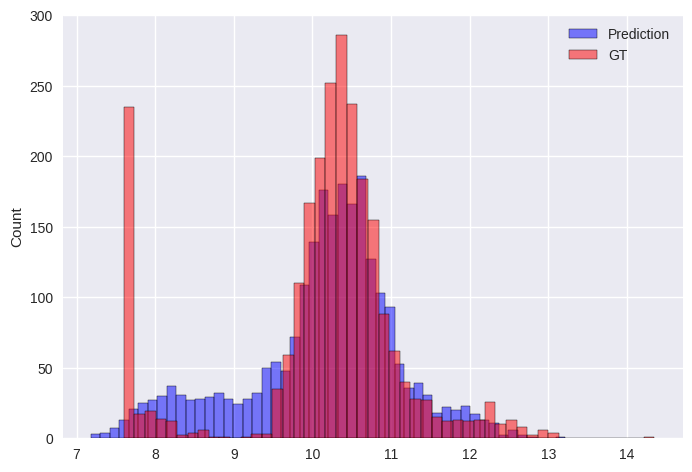

In [77]:
sns.histplot(y_test_pred,color='b',alpha=0.5,bins=50)
sns.histplot(y_test,color='r',alpha=0.5,bins=50)
plt.legend(['Prediction','GT'])

<AxesSubplot:>

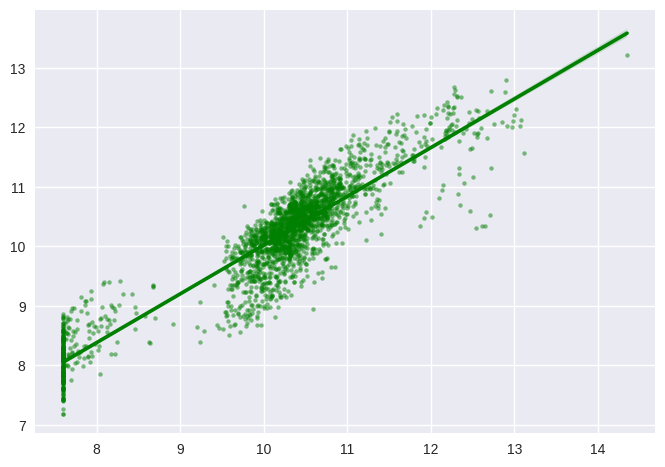

In [78]:
sns.regplot(x=y_test,y=y_test_pred,color='g',scatter_kws={'alpha':0.5,'s':10})

In reality, we would deploy our model in an application or website. So, typically an user will post the characteristic of his/her car and the back end would receive a dictionary.

In [79]:
car = df_test.iloc[20].to_dict()
actual_price = np.expm1(df_test.iloc[20]['price_logs'])
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031,
 'price_logs': 10.463131911491967}

In [80]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price_logs
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031,10.463132


In [81]:
X_car = prepare_X(df_small)
y_pred = X_car.dot(w) + w0
y_pred = np.expm1(y_pred)

print(f'A car will these characteristics should cost {y_pred}, its actual price is {actual_price}')
print(rmse(y_preds=y_pred,y=actual_price))

A car will these characteristics should cost [34983.19597411], its actual price is 35000.00000000001
16.804025893245125


## 2.16 Next Steps 

### 2.16.1 Add top 10 features for the categorical variables

In [83]:
cols = ['make','engine_fuel_type','transmission_type','driven_wheels','market_category','vehicle_size','vehicle_style'] 
categories = {c:df[c].value_counts().head(10).index.tolist() for c in cols}
categories

{'make': ['chevrolet',
  'ford',
  'volkswagen',
  'toyota',
  'dodge',
  'nissan',
  'gmc',
  'honda',
  'mazda',
  'cadillac'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel',
  'electric',
  'flex-fuel_(premium_unleaded_required/e85)',
  'flex-fuel_(premium_unleaded_recommended/e85)',
  'flex-fuel_(unleaded/natural_gas)',
  'natural_gas'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback',
  'performance',
  'crossover,luxury',
  'luxury,high-performance',
  'exotic,high-performance',
  'hatchback,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible'

### 2.16.1.1 Prepare datasets

In [84]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors == v).astype('int')
        features.append(f'num_doors_{v}')

    
    for c,values in categories.items():
        for v in values:
            df[f'{c}_{v}'] =  (df[c] == v).astype('int')
            features.append(f'{c}_{v}') 
        

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X 

In [85]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

### 2.16.1.2 Evaluate models

In [94]:
rmses = {}
for alpha in [0.0001,0.0001,0.001,0.01,0.1,1,10]:
    
    w0,w = train_linear_regression_reg(X_train,y_train,alpha=alpha)
    # Validation
    y_val_pred = X_val.dot(w) + w0

    rmses.update({str(alpha):rmse(y_preds=y_val_pred,y=y_val)})

best_param = min(rmses,key=rmses.get)
print(f"The best parameter is {best_param} with a score of {rmses[best_param]}")

The best parameter is 0.1 with a score of 0.4421722444399031


### 2.16.1.3 Use the model

In [99]:
df_full_train = pd.concat([df_train,df_val]).reset_index(drop=True)
len(df_train),len(df_val),len(df_full_train)
y_full_train = np.concatenate([y_train,y_val])

In [103]:
X_full_train = prepare_X(df_full_train)
w0,w = train_linear_regression_reg(X_full_train,y_full_train,alpha=float(best_param))

# Test
X_test = prepare_X(df_test)
y_test_pred = X_test.dot(w) + w0


rmse(y_preds=y_test_pred,y=y_test)

0.43712582164421765

In the previous iteration we got a score of 0.451774 for the test dataset. Now, after introducting the top 10 categorical features the score is  0.437125

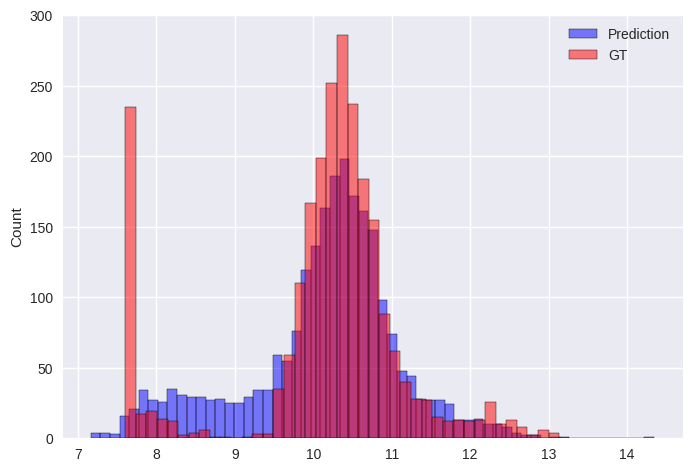

In [104]:
sns.histplot(y_test_pred,color='b',alpha=0.5,bins=50)
sns.histplot(y_test,color='r',alpha=0.5,bins=50)
plt.legend(['Prediction','GT'])